# Part 11 

## # Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [2]:
DATA_DIR = '../datasets/cats-n-dogs'

In [17]:
_height, _width, _channels = 64, 64, 3

### ## Read data

In [18]:
imgdatagen_train = ImageDataGenerator(rescale=1./255,
                               rotation_range=7,
                               horizontal_flip=True,
                               shear_range=0.2,
                               height_shift_range=0.07,
                               zoom_range=0.2)

In [19]:
imgdatagen_test = ImageDataGenerator(rescale=1./255)

In [20]:
train_data = imgdatagen_train.flow_from_directory(directory=f'{DATA_DIR}/training_set',
                                                target_size=(_height, _width),
                                                class_mode='binary')

Found 4000 images belonging to 2 classes.


In [21]:
train_data.class_indices

{'cachorro': 0, 'gato': 1}

In [22]:
test_data = imgdatagen_test.flow_from_directory(directory=f'{DATA_DIR}/test_set',
                                                target_size=(_height, _width),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [23]:
test_data.class_indices

{'cachorro': 0, 'gato': 1}

## # Model

In [24]:
from keras.models import Sequential
from keras.backend import clear_session
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [25]:
def model():

    clear_session()
    
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
              input_shape=(_height, _width, _channels)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(rate=0.25))

    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    print(model.summary())
    
    return model

In [26]:
clf = model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [27]:
!date

ter 15 dez 2020 13:04:36 -03


In [96]:
clf.fit(x=train_data, validation_data=test_data, epochs=1000)

Epoch 1/600
125/125 [==============================] - 10s 77ms/step - loss: 0.6262 - accuracy: 0.6403 - val_loss: 0.6871 - val_accuracy: 0.5740
Epoch 2/600
125/125 [==============================] - 10s 80ms/step - loss: 0.6063 - accuracy: 0.6532 - val_loss: 0.6371 - val_accuracy: 0.6050
Epoch 3/600
125/125 [==============================] - 11s 85ms/step - loss: 0.5966 - accuracy: 0.6780 - val_loss: 0.5919 - val_accuracy: 0.6840
Epoch 4/600
125/125 [==============================] - 10s 79ms/step - loss: 0.5897 - accuracy: 0.6752 - val_loss: 0.6244 - val_accuracy: 0.6610
Epoch 5/600
125/125 [==============================] - 9s 75ms/step - loss: 0.5738 - accuracy: 0.6990 - val_loss: 0.6057 - val_accuracy: 0.6730
Epoch 6/600
125/125 [==============================] - 10s 76ms/step - loss: 0.5797 - accuracy: 0.6892 - val_loss: 0.6194 - val_accuracy: 0.6640
Epoch 7/600
125/125 [==============================] - 10s 77ms/step - loss: 0.5573 - accuracy: 0.7092 - val_loss: 0.5917 - val_acc

125/125 [==============================] - 9s 72ms/step - loss: 0.2052 - accuracy: 0.9168 - val_loss: 0.6669 - val_accuracy: 0.7780
Epoch 58/600
125/125 [==============================] - 9s 72ms/step - loss: 0.2029 - accuracy: 0.9187 - val_loss: 0.7977 - val_accuracy: 0.7140
Epoch 59/600
125/125 [==============================] - 9s 73ms/step - loss: 0.1946 - accuracy: 0.9258 - val_loss: 0.7603 - val_accuracy: 0.7490
Epoch 60/600
125/125 [==============================] - 10s 77ms/step - loss: 0.2028 - accuracy: 0.9208 - val_loss: 0.5411 - val_accuracy: 0.7900
Epoch 61/600
125/125 [==============================] - 10s 78ms/step - loss: 0.1886 - accuracy: 0.9230 - val_loss: 0.5869 - val_accuracy: 0.7860
Epoch 62/600
125/125 [==============================] - 10s 80ms/step - loss: 0.1876 - accuracy: 0.9295 - val_loss: 0.7073 - val_accuracy: 0.7570
Epoch 63/600
125/125 [==============================] - 9s 74ms/step - loss: 0.1936 - accuracy: 0.9230 - val_loss: 0.7051 - val_accuracy: 0.

125/125 [==============================] - 8s 65ms/step - loss: 0.1086 - accuracy: 0.9555 - val_loss: 0.6896 - val_accuracy: 0.7910
Epoch 114/600
125/125 [==============================] - 8s 64ms/step - loss: 0.1134 - accuracy: 0.9553 - val_loss: 0.6433 - val_accuracy: 0.7810
Epoch 115/600
125/125 [==============================] - 8s 65ms/step - loss: 0.1258 - accuracy: 0.9470 - val_loss: 0.7031 - val_accuracy: 0.7780
Epoch 116/600
125/125 [==============================] - 8s 65ms/step - loss: 0.1016 - accuracy: 0.9617 - val_loss: 0.9337 - val_accuracy: 0.7470
Epoch 117/600
125/125 [==============================] - 9s 69ms/step - loss: 0.1082 - accuracy: 0.9613 - val_loss: 0.9063 - val_accuracy: 0.7630
Epoch 118/600
125/125 [==============================] - 9s 72ms/step - loss: 0.1029 - accuracy: 0.9620 - val_loss: 0.8069 - val_accuracy: 0.7700
Epoch 119/600
125/125 [==============================] - 9s 71ms/step - loss: 0.1062 - accuracy: 0.9588 - val_loss: 0.8830 - val_accuracy:

125/125 [==============================] - 8s 66ms/step - loss: 0.0780 - accuracy: 0.9718 - val_loss: 0.9192 - val_accuracy: 0.7850
Epoch 170/600
125/125 [==============================] - 8s 64ms/step - loss: 0.0821 - accuracy: 0.9710 - val_loss: 0.8424 - val_accuracy: 0.7750
Epoch 171/600
125/125 [==============================] - 8s 63ms/step - loss: 0.0787 - accuracy: 0.9722 - val_loss: 1.0006 - val_accuracy: 0.7740
Epoch 172/600
125/125 [==============================] - 8s 65ms/step - loss: 0.0935 - accuracy: 0.9655 - val_loss: 0.8028 - val_accuracy: 0.7860
Epoch 173/600
125/125 [==============================] - 8s 64ms/step - loss: 0.0595 - accuracy: 0.9797 - val_loss: 1.0669 - val_accuracy: 0.7660
Epoch 174/600
125/125 [==============================] - 8s 63ms/step - loss: 0.0826 - accuracy: 0.9675 - val_loss: 1.1582 - val_accuracy: 0.7280
Epoch 175/600
125/125 [==============================] - 8s 64ms/step - loss: 0.0883 - accuracy: 0.9697 - val_loss: 0.9590 - val_accuracy:

125/125 [==============================] - 9s 72ms/step - loss: 0.0631 - accuracy: 0.9765 - val_loss: 1.3243 - val_accuracy: 0.7450
Epoch 226/600
125/125 [==============================] - 8s 67ms/step - loss: 0.0751 - accuracy: 0.9743 - val_loss: 0.9936 - val_accuracy: 0.7660
Epoch 227/600
125/125 [==============================] - 8s 67ms/step - loss: 0.0651 - accuracy: 0.9753 - val_loss: 1.1153 - val_accuracy: 0.7610
Epoch 228/600
125/125 [==============================] - 8s 68ms/step - loss: 0.0748 - accuracy: 0.9747 - val_loss: 0.8907 - val_accuracy: 0.7820
Epoch 229/600
125/125 [==============================] - 10s 80ms/step - loss: 0.0571 - accuracy: 0.9793 - val_loss: 0.9605 - val_accuracy: 0.7870
Epoch 230/600
125/125 [==============================] - 9s 70ms/step - loss: 0.0632 - accuracy: 0.9760 - val_loss: 0.9254 - val_accuracy: 0.7930
Epoch 231/600
125/125 [==============================] - 8s 67ms/step - loss: 0.0612 - accuracy: 0.9810 - val_loss: 0.8956 - val_accuracy

125/125 [==============================] - 8s 66ms/step - loss: 0.0507 - accuracy: 0.9830 - val_loss: 0.9686 - val_accuracy: 0.8100
Epoch 282/600
125/125 [==============================] - 8s 67ms/step - loss: 0.0499 - accuracy: 0.9833 - val_loss: 0.9640 - val_accuracy: 0.7800
Epoch 283/600
125/125 [==============================] - 9s 69ms/step - loss: 0.0489 - accuracy: 0.9827 - val_loss: 0.9512 - val_accuracy: 0.8030
Epoch 284/600
125/125 [==============================] - 8s 68ms/step - loss: 0.0526 - accuracy: 0.9815 - val_loss: 1.0442 - val_accuracy: 0.8000
Epoch 285/600
125/125 [==============================] - 9s 71ms/step - loss: 0.0618 - accuracy: 0.9772 - val_loss: 1.0893 - val_accuracy: 0.7540
Epoch 286/600
125/125 [==============================] - 9s 68ms/step - loss: 0.0637 - accuracy: 0.9762 - val_loss: 0.9635 - val_accuracy: 0.7790
Epoch 287/600
125/125 [==============================] - 8s 67ms/step - loss: 0.0501 - accuracy: 0.9818 - val_loss: 0.9072 - val_accuracy:

125/125 [==============================] - 9s 71ms/step - loss: 0.0519 - accuracy: 0.9818 - val_loss: 1.3009 - val_accuracy: 0.7630
Epoch 338/600
125/125 [==============================] - 9s 68ms/step - loss: 0.0543 - accuracy: 0.9810 - val_loss: 1.1961 - val_accuracy: 0.7700
Epoch 339/600
125/125 [==============================] - 9s 68ms/step - loss: 0.0499 - accuracy: 0.9833 - val_loss: 1.0072 - val_accuracy: 0.7800
Epoch 340/600
125/125 [==============================] - 8s 67ms/step - loss: 0.0428 - accuracy: 0.9843 - val_loss: 1.2064 - val_accuracy: 0.7640
Epoch 341/600
125/125 [==============================] - 8s 68ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.9611 - val_accuracy: 0.7690
Epoch 342/600
125/125 [==============================] - 8s 68ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 1.1103 - val_accuracy: 0.7680
Epoch 343/600
125/125 [==============================] - 9s 68ms/step - loss: 0.0380 - accuracy: 0.9862 - val_loss: 1.1534 - val_accuracy:

125/125 [==============================] - 8s 64ms/step - loss: 0.0379 - accuracy: 0.9858 - val_loss: 1.2264 - val_accuracy: 0.7940
Epoch 394/600
125/125 [==============================] - 8s 64ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 1.1771 - val_accuracy: 0.7850
Epoch 395/600
125/125 [==============================] - 8s 65ms/step - loss: 0.0408 - accuracy: 0.9843 - val_loss: 1.2822 - val_accuracy: 0.7640
Epoch 396/600
125/125 [==============================] - 8s 66ms/step - loss: 0.0384 - accuracy: 0.9875 - val_loss: 1.3483 - val_accuracy: 0.7580
Epoch 397/600
125/125 [==============================] - 9s 69ms/step - loss: 0.0464 - accuracy: 0.9865 - val_loss: 1.2065 - val_accuracy: 0.7720
Epoch 398/600
125/125 [==============================] - 8s 68ms/step - loss: 0.0453 - accuracy: 0.9840 - val_loss: 1.1343 - val_accuracy: 0.7570
Epoch 399/600
125/125 [==============================] - 9s 70ms/step - loss: 0.0394 - accuracy: 0.9858 - val_loss: 1.3057 - val_accuracy:

125/125 [==============================] - 9s 73ms/step - loss: 0.0390 - accuracy: 0.9850 - val_loss: 1.2823 - val_accuracy: 0.7960
Epoch 450/600
125/125 [==============================] - 8s 65ms/step - loss: 0.0477 - accuracy: 0.9837 - val_loss: 1.2686 - val_accuracy: 0.7910
Epoch 451/600
125/125 [==============================] - 8s 68ms/step - loss: 0.0280 - accuracy: 0.9898 - val_loss: 1.3213 - val_accuracy: 0.7850
Epoch 452/600
125/125 [==============================] - 9s 68ms/step - loss: 0.0252 - accuracy: 0.9910 - val_loss: 1.6909 - val_accuracy: 0.7750
Epoch 453/600
125/125 [==============================] - 9s 68ms/step - loss: 0.0433 - accuracy: 0.9858 - val_loss: 1.0940 - val_accuracy: 0.7900
Epoch 454/600
125/125 [==============================] - 9s 70ms/step - loss: 0.0365 - accuracy: 0.9875 - val_loss: 1.4615 - val_accuracy: 0.7700
Epoch 455/600
125/125 [==============================] - 9s 69ms/step - loss: 0.0435 - accuracy: 0.9855 - val_loss: 1.7163 - val_accuracy:

125/125 [==============================] - 10s 78ms/step - loss: 0.0439 - accuracy: 0.9865 - val_loss: 1.1385 - val_accuracy: 0.7870
Epoch 506/600
125/125 [==============================] - 9s 73ms/step - loss: 0.0363 - accuracy: 0.9870 - val_loss: 1.1814 - val_accuracy: 0.7880
Epoch 507/600
125/125 [==============================] - 9s 72ms/step - loss: 0.0427 - accuracy: 0.9852 - val_loss: 1.3892 - val_accuracy: 0.7960
Epoch 508/600
125/125 [==============================] - 9s 75ms/step - loss: 0.0317 - accuracy: 0.9875 - val_loss: 1.2928 - val_accuracy: 0.7800
Epoch 509/600
125/125 [==============================] - 9s 76ms/step - loss: 0.0323 - accuracy: 0.9883 - val_loss: 1.1996 - val_accuracy: 0.7920
Epoch 510/600
125/125 [==============================] - 9s 74ms/step - loss: 0.0320 - accuracy: 0.9877 - val_loss: 1.6355 - val_accuracy: 0.7590
Epoch 511/600
125/125 [==============================] - 9s 71ms/step - loss: 0.0430 - accuracy: 0.9852 - val_loss: 1.2150 - val_accuracy

125/125 [==============================] - 8s 64ms/step - loss: 0.0342 - accuracy: 0.9877 - val_loss: 1.8025 - val_accuracy: 0.7580
Epoch 562/600
125/125 [==============================] - 8s 64ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 1.1793 - val_accuracy: 0.7840
Epoch 563/600
125/125 [==============================] - 8s 64ms/step - loss: 0.0302 - accuracy: 0.9920 - val_loss: 1.4449 - val_accuracy: 0.7500
Epoch 564/600
125/125 [==============================] - 8s 64ms/step - loss: 0.0371 - accuracy: 0.9900 - val_loss: 1.3047 - val_accuracy: 0.7800
Epoch 565/600
125/125 [==============================] - 9s 70ms/step - loss: 0.0448 - accuracy: 0.9877 - val_loss: 1.3156 - val_accuracy: 0.7980
Epoch 566/600
125/125 [==============================] - 9s 72ms/step - loss: 0.0319 - accuracy: 0.9908 - val_loss: 1.2231 - val_accuracy: 0.7770
Epoch 567/600
125/125 [==============================] - 9s 69ms/step - loss: 0.0328 - accuracy: 0.9865 - val_loss: 1.3133 - val_accuracy:

In [97]:
!date

ter 15 dez 2020 15:00:46 -03


### ## Export and import

In [104]:
def _export_model(clf, file):
    model = f'{file}-model.json'
    weights = f'{file}-weights.h5'
    with open(model, mode='w') as f:
        f.write(clf.to_json())
    clf.save_weights(weights)
    return model, weights

In [105]:
_export_model(clf, 'sess_11')

('sess_11-model.json', 'sess_11-weights.h5')

In [107]:
from keras.models import model_from_json

In [ ]:
def _import_model(clf_file, weight_file):
    with open(clf_file, mode='r') as f:
        clf_str = f.read()
    clf = model_from_json(json_string=clf_str)
    clf.load_weights(weight_file)
    return clf

In [ ]:
clf = _import_model('sess_11-model.json', 'sess_11-weights.h5')

## # Evaluation

In [98]:
from sklearn.metrics import classification_report

In [99]:
pred = clf.predict(test_data) > 0.5

In [100]:
_ = classification_report(test_data.classes, pred)
print(_)

              precision    recall  f1-score   support

           0       0.51      0.56      0.54       500
           1       0.51      0.46      0.48       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



### ## Predict on new data

In [101]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [102]:
new_data = ['cat1.jpg', 'cat3.jpeg', 'dog2.jpg', 'cat2.jpeg', 'dog1.jpg', 'dog3.jpg']
d_pred = {True: 'Dog', False: 'Cat'}

>> Image: cat1.jpg


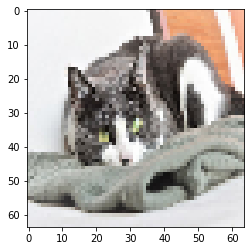

# Predicted: Cat with 0.00% probability
++ CORRECT!

>> Image: cat3.jpeg


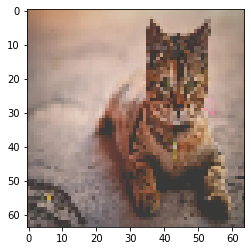

# Predicted: Dog with 1.00% probability
-- WRONG!

>> Image: dog2.jpg


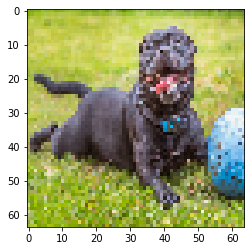

# Predicted: Cat with 0.00% probability
-- WRONG!

>> Image: cat2.jpeg


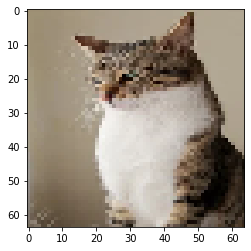

# Predicted: Dog with 1.00% probability
-- WRONG!

>> Image: dog1.jpg


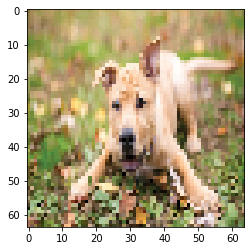

# Predicted: Cat with 0.00% probability
-- WRONG!

>> Image: dog3.jpg


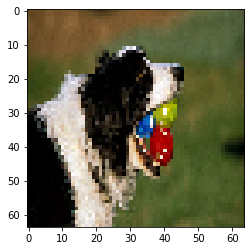

In [ ]:
def pred_new_data(new_data):
    for pic in new_data:
        print(f'>> Image: {pic}')
    
        img = image.load_img(path=f'{DATA_DIR}/{pic}', target_size=(_height, _width))
        img = image.img_to_array(img)/255
        img = np.expand_dims(a=img, axis=0)
        plt.imshow(img[0])
        plt.show()
    
        pred_prob = clf.predict(img)[0][0]
        pred = pred_prob > 0.5
        pred = d_pred[pred]
    
        print('# Predicted: {} with {:.2f}% probability'.format(pred, pred_prob))
        if pred.lower() in pic:
            print('++ CORRECT!\n')
        else:
            print('-- WRONG!\n')

pred_new_data(new_data)